# Homework 2

The shooting method which bootstraps a boundary value problem solution by iterating over initial value problems. 

## 1. Quantum Mechanics On The Computer

The time-independent Schrödinger equation for a single particle in one spatial dimension:

\begin{equation}
-\frac{1}{2m}\frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
\end{equation}

As a system of two first order ODEs:

\begin{equation}
\frac{d \phi(x)}{dx} = 2m(V(x)-E)\psi(x)
\end{equation}

\begin{equation}
\frac{d \psi(x)}{dx} = \phi(x)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#RK4 Solver

def RK4_solver(psi_a,d_psi_a,a,b,V,E,m):
    """
    Function solving Schrodinger equation for wave function psi
    
    :param psi_a: float, initial value of psi
    :param d_psi_a: float, initial value of derivative of psi
    :param a: float,lower boundry
    :param b: float,upper boundary
    :param V: function, potential of Schrodinger equation
    :param E: float, energy eigenvalue
    :param m: float, mass
    """

    number_steps = 1000
    x_points = np.linspace(a,b,number_steps)
    phi_points = np.zeros(len(x_points))
    psi_points = np.zeros(len(x_points))
    h = (b-a)/number_steps #step size

    #initial values

    phi = d_psi_a
    psi = psi_a


    #iteration step 
    for i in range(0, len(x_points)):
        phi_points[i] = phi 
        psi_points[i] = psi
        x = x_points[i]

        k1_phi = 2*m *(V(x)- E)* psi
        k1_psi = phi

        k2_phi = 2*m *(V(x+h/2)- E)* (psi +h*k1_psi/2)
        k2_psi = phi + h*k1_phi/2
       
        k3_phi = 2*m *(V(x+h/2)- E)* (psi +h*k2_psi/2)
        k3_psi = phi + h*k2_phi/2
       
        k4_phi = 2*m *(V(x+h)- E)* (psi +h*k3_psi)
        k4_psi = phi + h*k3_phi

        phi += h * (k1_phi + 2*k2_phi +2*k3_phi + k4_phi)/6
        psi += h * (k1_psi + 2*k2_psi +2*k3_psi + k4_psi)/6
        
    return x_points,phi_points,psi_points

Free particle $V(x)=0$

In [33]:
def V1(x):
    return 0.0

In [34]:
m=1
E=1
psi_a = 0
d_psi_a =1
X,dP,P = RK4_solver(psi_a,d_psi_a,0,10,V1,E,m)

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_5807/1087883179.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(X,P, label = "$\psi(x)$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_5807/1087883179.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(X,Y, label = "$sin(\sqrt{{2mE}}x)$")


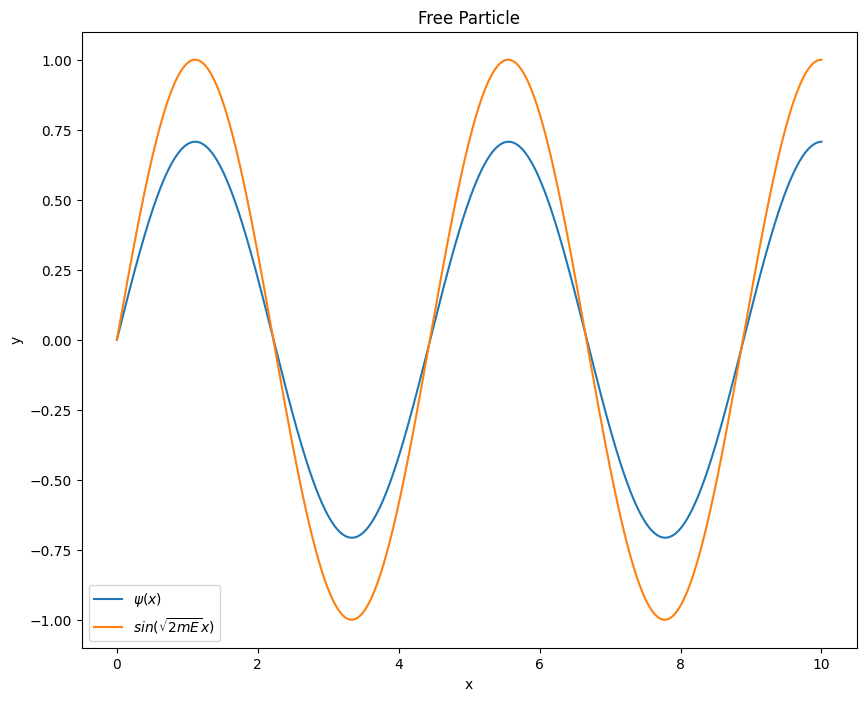

In [35]:
fig,ax = plt.subplots(figsize=(10, 8))
Y = np.sin(np.sqrt(2) * X)
ax.plot(X,P, label = "$\psi(x)$")
ax.plot(X,Y, label = "$sin(\sqrt{{2mE}}x)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Free Particle")
ax.legend()
plt.savefig("free_partical.png")
plt.show()

Harmonic Oscillator $V(x)=m\omega^2 x^2/2 $